# Principal Component Analysis

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [6]:
student_data_mat   = pd.read_csv("student-mat.csv",delimiter=";")
student_data_por   = pd.read_csv("student-por.csv",delimiter=";")
student_data = pd.merge(student_data_mat,student_data_por,how="outer")
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
col_str = student_data.columns[student_data.dtypes == object]
col_str

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [8]:
student_data = pd.get_dummies(student_data, columns = col_str, drop_first = True)
student_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1043
Data columns (total 42 columns):
age                  1044 non-null int64
Medu                 1044 non-null int64
Fedu                 1044 non-null int64
traveltime           1044 non-null int64
studytime            1044 non-null int64
failures             1044 non-null int64
famrel               1044 non-null int64
freetime             1044 non-null int64
goout                1044 non-null int64
Dalc                 1044 non-null int64
Walc                 1044 non-null int64
health               1044 non-null int64
absences             1044 non-null int64
G1                   1044 non-null int64
G2                   1044 non-null int64
G3                   1044 non-null int64
school_MS            1044 non-null uint8
sex_M                1044 non-null uint8
address_U            1044 non-null uint8
famsize_LE3          1044 non-null uint8
Pstatus_T            1044 non-null uint8
Mjob_health          1044 non-nu

In [9]:
print(student_data[["G1","G2","G3"]].corr())

          G1        G2        G3
G1  1.000000  0.858739  0.809142
G2  0.858739  1.000000  0.910743
G3  0.809142  0.910743  1.000000


In [10]:
 # Since, G1,G2,G3 have very high correlation, we can drop G1/G2
student_data.drop(axis = 1,labels= ["G1"],inplace=True)
#student_data.drop(axis = 1,labels= ["higher_yes","Mjob_health","school_MS",],inplace=True)

In [11]:
label = student_data["G3"].values
predictors = student_data.drop(axis = 1,labels= ["G3"]).values

In [12]:
predictors

array([[18,  4,  4, ...,  1,  0,  0],
       [17,  1,  1, ...,  1,  1,  0],
       [15,  1,  1, ...,  1,  1,  0],
       ...,
       [18,  1,  1, ...,  1,  0,  0],
       [17,  3,  1, ...,  1,  1,  0],
       [18,  3,  2, ...,  1,  1,  0]], dtype=int64)

In [13]:
student_data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,19,2,3,1,3,1,5,4,2,1,...,1,0,0,0,0,1,0,1,1,0
1040,18,3,1,1,2,0,4,3,4,1,...,1,0,0,1,0,0,1,1,1,0
1041,18,1,1,2,2,0,1,1,1,1,...,1,0,0,0,0,1,1,1,0,0
1042,17,3,1,2,1,0,2,4,5,3,...,1,0,0,0,0,0,0,1,1,0


In [14]:
pca = PCA(n_components=len(student_data.columns)-1)
pca.fit(predictors)
variance_ratio = pca.explained_variance_ratio_
variance_ratio

array([5.79236396e-01, 1.64963457e-01, 3.88164111e-02, 3.28052200e-02,
       2.92022565e-02, 2.09482956e-02, 1.90656757e-02, 1.18552767e-02,
       1.14649908e-02, 9.57763624e-03, 8.10952197e-03, 7.22346787e-03,
       6.19826896e-03, 5.77905599e-03, 4.96259970e-03, 4.01558577e-03,
       3.79536791e-03, 3.71148039e-03, 3.46159046e-03, 3.35688248e-03,
       3.23435693e-03, 2.87833995e-03, 2.54589136e-03, 2.36156079e-03,
       2.24614821e-03, 2.18192181e-03, 2.14307522e-03, 1.95102443e-03,
       1.84735421e-03, 1.55547384e-03, 1.36945892e-03, 1.32873513e-03,
       1.26143694e-03, 1.08170666e-03, 9.16154637e-04, 9.06073498e-04,
       6.16485005e-04, 5.58581821e-04, 3.09459007e-04, 1.57324596e-04])

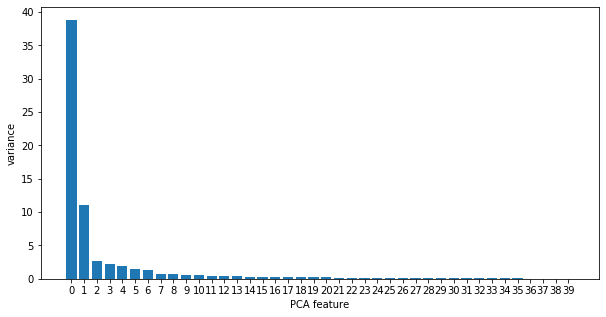

In [15]:
plt.figure(figsize=[10,5])
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [16]:
pca.explained_variance_

array([3.88192413e+01, 1.10555143e+01, 2.60139667e+00, 2.19853891e+00,
       1.95707564e+00, 1.40391203e+00, 1.27774268e+00, 7.94516457e-01,
       7.68360293e-01, 6.41873638e-01, 5.43483615e-01, 4.84102077e-01,
       4.15395338e-01, 3.87300541e-01, 3.32583306e-01, 2.69116365e-01,
       2.54357813e-01, 2.48735843e-01, 2.31988729e-01, 2.24971415e-01,
       2.16760002e-01, 1.92900470e-01, 1.70620444e-01, 1.58266986e-01,
       1.50532270e-01, 1.46227948e-01, 1.43624528e-01, 1.30753676e-01,
       1.23805910e-01, 1.04244683e-01, 9.17783427e-02, 8.90491169e-02,
       8.45389295e-02, 7.24937732e-02, 6.13988144e-02, 6.07231970e-02,
       4.13155671e-02, 3.74350139e-02, 2.07393112e-02, 1.05435734e-02])

[ 57.92  74.42  78.3   81.58  84.5   86.59  88.5   89.69  90.84  91.8
  92.61  93.33  93.95  94.53  95.03  95.43  95.81  96.18  96.53  96.87
  97.19  97.48  97.73  97.97  98.19  98.41  98.62  98.82  99.    99.16
  99.3   99.43  99.56  99.67  99.76  99.85  99.91  99.97 100.   100.02]


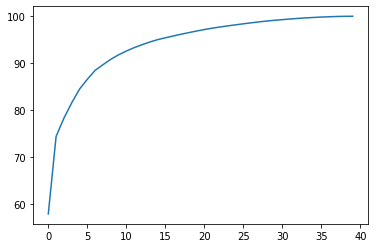

In [17]:
variance_ratio_cum_sum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(variance_ratio_cum_sum)
plt.plot(variance_ratio_cum_sum)

In [18]:
#Looking at above plot I'm taking 8 variables
pca = PCA(n_components=8)
pca.fit(predictors)
Transformed_vector =pca.fit_transform(predictors)
print(Transformed_vector)

[[ 1.92298329  4.71291021 -1.07685432 ...  2.06798623  0.23602156
  -0.60301026]
 [-0.09761924  6.2152225  -2.22763967 ...  0.05951487  1.03563906
  -0.29551364]
 [ 5.73390651  3.12482338 -1.00989074 ... -2.38958213 -0.21704932
   0.62165534]
 ...
 [ 1.45570448 -0.64383534 -2.41851134 ...  0.06639842 -2.82231684
  -0.7019797 ]
 [ 1.7730034   1.46090908  2.1773092  ... -1.06103291 -0.36389584
   0.12318981]
 [-0.33400604  0.60258662  1.71590152 ...  0.25515986 -1.83654039
   2.54953991]]


In [19]:
student_data_without_label=student_data.drop(axis = 1,labels= ["G3"],inplace=False)
features=student_data_without_label.columns
features

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G2',
       'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

Text(204.0, 0.5, 'Principal components')

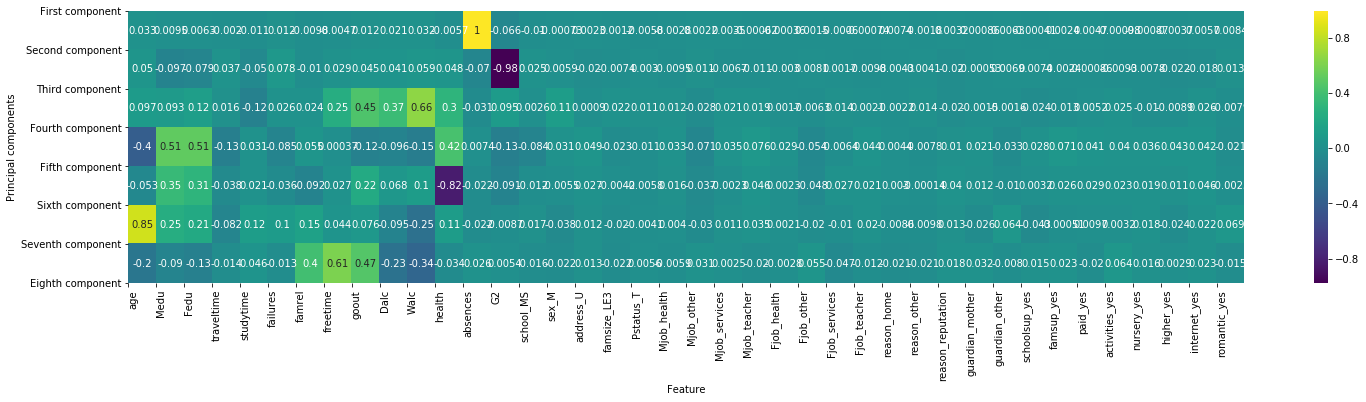

In [20]:
#Visualize coefficients using heat map

plt.figure(figsize=[25,5])
sns.heatmap(pca.components_[0:7,:],annot=True,cmap='viridis')
plt.yticks([0,1,2,3,4,5,6,7],["First component","Second component","Third component","Fourth component","Fifth component","Sixth component","Seventh component","Eighth component"],rotation=360,ha="right")
plt.xticks(range(len(features)),features,rotation=90,ha="left")
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [21]:
lr_pca = linear_model.LinearRegression()

In [22]:
score_lr_pca = cross_val_score(lr_pca, Transformed_vector, label, cv=5)
print("PCA Model Cross Validation score : " + str(score_lr_pca))
print("PCA Model Cross Validation Mean score : " + str(score_lr_pca.mean()))

PCA Model Cross Validation score : [0.87587861 0.73033901 0.73559423 0.83448587 0.82221483]
PCA Model Cross Validation Mean score : 0.7997025111309425


In [23]:
lr = linear_model.LinearRegression()
score_lr = cross_val_score(lr, predictors, label, cv=5)
print("LR Model Cross Validation score : " + str(score_lr))
print("LR Model Cross Validation Mean score : " + str(score_lr.mean()))

LR Model Cross Validation score : [0.87841656 0.71763428 0.7310715  0.79448747 0.8121261 ]
LR Model Cross Validation Mean score : 0.7867471805758175


In [24]:
predictors


array([[18,  4,  4, ...,  1,  0,  0],
       [17,  1,  1, ...,  1,  1,  0],
       [15,  1,  1, ...,  1,  1,  0],
       ...,
       [18,  1,  1, ...,  1,  0,  0],
       [17,  3,  1, ...,  1,  1,  0],
       [18,  3,  2, ...,  1,  1,  0]], dtype=int64)